In [9]:
% pkg install -forge io


For information about changes from previous versions of the io package, run 'news io'.


In [1]:
pkg load io

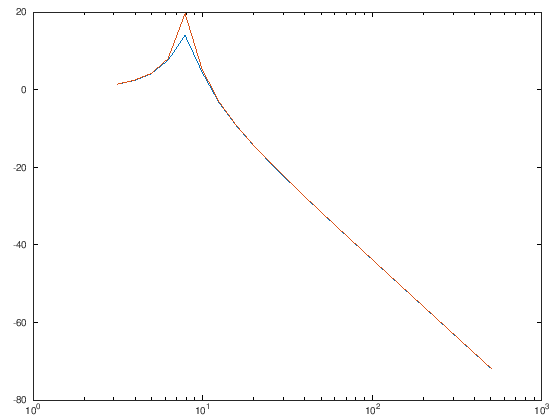

In [3]:
damping_compare

In [40]:
[a,B] = IG(48e6*1.4,.7);

k =  34000000


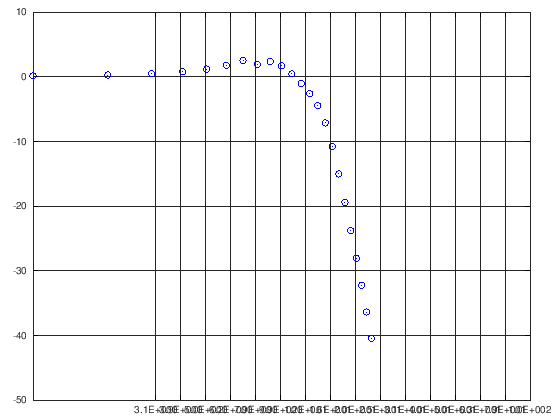

In [47]:
semilogx(B,"bo")
set (gca, 'xtick', a); 
xticks = get (gca, "xtick");
xlabels = arrayfun (@(x) sprintf("%1.1E",x), xticks, "uniformoutput", false);
set (gca, 'xticklabel', xlabels);
set (gca,'xminortick','off');
grid on;

In [26]:
clear IG

In [48]:
a


a =

     3.1250
     3.9373
     4.9606
     6.2500
     7.8745
     9.9213
    12.5000
    15.7490
    19.8425
    25.0000
    31.4980
    39.6850
    50.0000
    62.9961
    79.3701
   100.0000
   125.9921
   158.7401
   200.0000
   251.9842
   317.4802
   400.0000
   503.9684



In [25]:
NDOF_f2([1,2],[5,6],[0,0],[7,7],1)

M =

   1   0   0   0
   0   1   0   0
   0   0   5   0
   0   0   0   6

b1 =

  -2   3  -1
  -1   2  -2

b2 =

  -0   0  -0
  -0   0  -0

K =

   0   0  -1   0
   0   0   0  -1
   3  -2   0   0
  -2   2   0   0

F =

   0   0   7   7

Y0 =

  -0.03571 - 0.00000i
  -0.02950 - 0.00000i
   0.00000 - 0.22435i
   0.00000 - 0.18535i

V =

 Columns 1 through 3:

   1.00000 + 0.00000i   1.00000 - 0.00000i   0.76619 + 0.00000i
  -0.63849 - 0.00000i  -0.63849 + 0.00000i   1.00000 + 0.00000i
  -0.00000 - 0.92488i  -0.00000 + 0.92488i   0.00000 - 0.21390i
   0.00000 + 0.59053i   0.00000 - 0.59053i   0.00000 - 0.27917i

 Column 4:

   0.76619 - 0.00000i
   1.00000 - 0.00000i
   0.00000 + 0.21390i
   0.00000 + 0.27917i

D =

Diagonal Matrix

 Columns 1 through 3:

   0.00000 + 0.92488i                    0                    0
                    0   0.00000 - 0.92488i                    0
                    0                    0   0.00000 + 0.27917i
                    0                    0   

In [22]:
NDOF_f2(1,2,.11,1,1)

M =

   1   0
   0   2

K =

   0.00000  -1.00000
   1.00000   0.11000

F =

   0   1

Y0 =

  -1.2827e-002 - 1.1372e-004i
  7.1451e-004 - 8.0592e-002i

V =

  -1.00000 + 0.00000i  -1.00000 - 0.00000i
   0.02750 + 0.70657i   0.02750 - 0.70657i

D =

Diagonal Matrix

   0.02750 + 0.70657i                    0
                    0   0.02750 - 0.70657i

ans =

  -1.2827e-002 - 1.1372e-004i
  7.1451e-004 - 8.0592e-002i



In [24]:
D.*D

ans =

  -2.5266e+003 - 2.5266e+002i  0.0000e+000 + 0.0000e+000i
  0.0000e+000 + 0.0000e+000i  -2.5266e+003 - 2.5266e+002i



# `NDOF` revisited for the $N$th time

Stiffness matrix:

$\begin{bmatrix}
-(k_1+k_2) & k_2 & 0 & \cdots  & 0\\ 
k_2 & -(k_2+k_3) & k_3 & \cdots & \vdots\\ 
0 & k_3 & \ddots & \ddots & 0\\ 
\vdots & 0 & \ddots & -(k_{n-1}+k_n)  & k_n\\ 
0 & \cdots & 0 & k_n & -k_n
\end{bmatrix}$

can include damping into the stiffness matrix by the transformation:

$k \rightarrow k + i \omega c $ for "traditional" viscous damping.
$k \rightarrow k + i c $ for "traditional" viscous damping.
need to vet the above

Mass matrix:
$-\omega^2 \begin{bmatrix}
m_1 & 0 & 0 & \cdots  & 0\\ 
0 & m_2 & \ddots & \ddots & \vdots\\ 
0 & \ddots & \ddots & \ddots & 0\\ 
\vdots & 0 & \ddots & m_{n-1}  & 0\\ 
0 & \cdots & \cdots & 0 & m_n
\end{bmatrix}$

(the matrix typography above needs a bit of work)

You would think this sufficient for describing the system, but the implementation in `NDOF` has separate velocities and displacements (even though those are not indpenedent?). I can not remember at the moment why I did it this way. Why was it necessary? Is it actually less efficient? In any case, to verify and document, I'll give it a shot:

Another way to explain it: For $N$-d.o.f. system, we actually form a set of $2N$ independent equations, for all displacements and velocities. 

In [38]:
circshift(-[1 2 3]',-1')

ans =

  -2
  -3
  -1



In [40]:
k=[1 2 3]

k =

   1   2   3



In [42]:
b1 = [ circshift(-k',-1)  k' + [k(2:end)' ; 0]  -k' ]


b1 =

  -2   3  -1
  -3   5  -2
  -1   3  -3



In [44]:
full(spdiags(b1,-1:1,3,3))

ans =

   3  -2   0
  -2   5  -3
   0  -3   3



In [48]:
K

K =

   0  -1
   4   0



In [28]:
eig(k,m)

ans =  4


In [50]:
[v,d]= eig(K,m)

v =

  -0.12500 + 0.48412i  -0.12500 - 0.48412i
   1.00000 + 0.00000i   1.00000 - 0.00000i

d =

Diagonal Matrix

   0.5000 + 1.9365i                  0
                  0   0.5000 - 1.9365i



In [52]:
imag(d)

ans =

Diagonal Matrix

   1.9365        0
        0  -1.9365



## 

In [49]:
m = [1 0 ; 0 1]
K = [0 -1; 4 1 ]
F = [0 force_vec]

m =

   1   0
   0   1

K =

   0  -1
   4   1

F =

   0   1

